# 빈도 분석
<!-- 5-1 -->


In [1]:
import sys
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Polygon
from scipy.stats import multivariate_normal

1. numpy의 설치
- 가상환경의 선택
- conda install numpy
    Anaconda 설치 경로의 확인:

2. 벡터와 행렬의 생성
    numpy.array 
(1) 리스트를 이용한 벡터의 생성
(2) numpy.zeros(), numpy.ones()
(3) numpy.repeat()
(4) 리스트를 이용한 행렬의 생성
(5) 대각행렬 생성하기 (numpy.diag())

3. 벡터와 행렬의 형태 변환
(1) shape 이해하기
(2) reshape 이해하기 (order = ‘C’ or ‘F’)
----

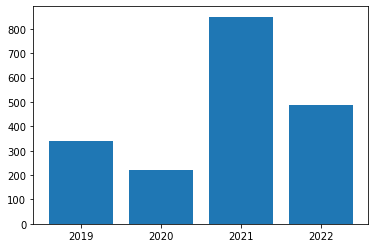

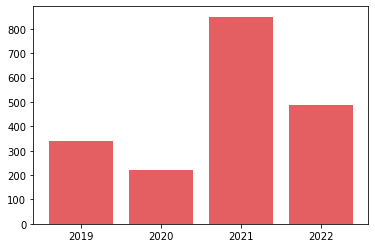

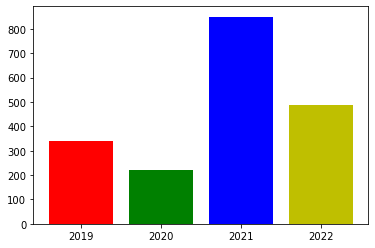

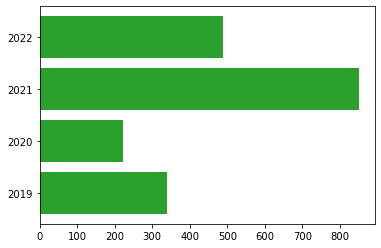

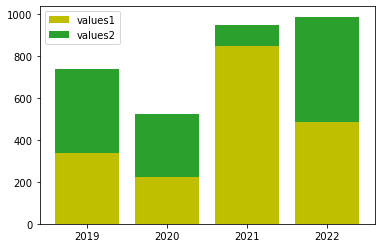

객체 타입: <class 'matplotlib.container.BarContainer'>
막대의 갯수: 4


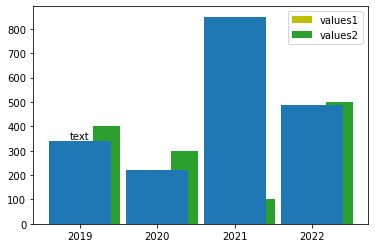

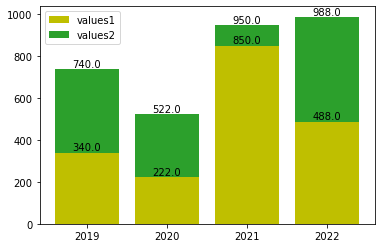

In [2]:
'''5-1-1 barplot의 기본과 변형 '''
x = np.arange(4)
years = ['2019', '2020', '2021', '2022']
values1 = [340, 222, 850, 488]

#%% 기본 막대 그래프
plt.bar(x, values1)
plt.xticks(x, years)
plt.show()

#%% color code를 이용한 색 지정
plt.bar(x, values1, color='#e35f62')
plt.xticks(x, years)
plt.show()

#%% bar 마다 다르게 색 지정
plt.bar(x, values1, color=["r", "g", "b", "y"])
plt.xticks(x, years)
plt.show()

#%% 수평 막대 그래프
plt.barh(x, values1, color="C2")
plt.yticks(x, years)
plt.show()

#%% 스택 막대 그래프
values2 = [400, 300, 100, 500]

p1 = plt.bar(x, values1, color='y')
p2 = plt.bar(x, values2, color='C2', bottom=values1)

plt.xticks(x, years)
plt.legend((p1[0], p2[0]), ('values1', 'values2'))
plt.show()

#%% Dodged 막대 그래프
bar_width = 0.35

p1 = plt.bar(x, values1, bar_width, color='y', label='values1')
p2 = plt.bar(x + bar_width, values2, bar_width, color='C2', label='values2')

plt.xticks(x, years)
plt.legend((p1[0], p2[0]), ('values1', 'values2'))


#%%
'''5-1-2 bar 위에 text의 표시'''
bar = plt.bar(x, values1)
plt.xticks(x, years)

print(f"객체 타입: {type(bar)}")
print(f"막대의 갯수: {len(bar)}")

select_bar = bar[0]
plt.text(
   x=select_bar.get_x() + select_bar.get_width()/2.0,
   y=select_bar.get_height(),
   s="text",
   ha='center', va='bottom'
   )
plt.show()


#%%
p1 = plt.bar(x, values1, color='y')
for rect in p1:
   height = rect.get_height()
   plt.text(
      x=rect.get_x() + rect.get_width()/2.0,
      y=height,
      s='%.1f' % height,
      ha='center', va='bottom'
      )

p2 = plt.bar(x, values2, color='C2', bottom=values1)
for i, rect in enumerate(p2):
   height = rect.get_height() + p1[i].get_height()
   plt.text(
      x=rect.get_x() + rect.get_width()/2.0,
      y=height,
      s='%.1f' % height,
      ha='center', va='bottom'
      )

plt.xticks(x, years)
plt.legend((p1[0], p2[0]), ('values1', 'values2'))
plt.show()

In [ ]:
#%%
'''5-1-3 barplot을 이용한 자전거 수요 데이터 시각화'''
df = pd.read_csv("http://ranking.uos.ac.kr/class/VIS/data/bike_demand.csv", parse_dates=["datetime"])

print(df.head(5))
print(df.info())

#%%
print("=====Missing Rate=====")
for col in df.columns:
   missing_ratio = df[col].isnull().sum() / len(df[col])
   print(f"{col}: {round(missing_ratio, 2)}%")

#%%
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df["dayofweek"] = df["datetime"].dt.dayofweek

#%%
col = "year"
fig, ax = plt.subplots(figsize=(10, 10), facecolor="white")
x = df.groupby(col)["count"].sum().index.tolist()
y = df.groupby(col)["count"].sum().tolist()
bar = ax.bar(x, y)
ax.set_xticks(x)
ax.set_title(col)

for rect in bar:
   height = rect.get_height()
   plt.text(
      x=rect.get_x() + rect.get_width()/2.0,
      y=height,
      s=height,
      ha='center', va='bottom'
      )

#%%
col = "month"
fig, ax = plt.subplots(figsize=(10, 10), facecolor="white")
x = df.groupby(col)["count"].sum().index.tolist()
y = df.groupby(col)["count"].sum().tolist()
bar = ax.bar(x, y)
ax.set_xticks(x)
ax.set_title(col)

for rect in bar:
   height = rect.get_height()
   plt.text(
      x=rect.get_x() + rect.get_width()/2.0,
      y=height,
      s=height,
      ha='center', va='bottom'
      )

#%%
col = "dayofweek"
fig, ax = plt.subplots(figsize=(10, 10), facecolor="white")
x = df.groupby(col)["count"].sum().index.tolist()
y = df.groupby(col)["count"].sum().tolist()
bar = ax.bar(x, y)
ax.set_xticks(x)
ax.set_title(col)

for rect in bar:
   height = rect.get_height()
   plt.text(
      x=rect.get_x() + rect.get_width()/2.0,
      y=height,
      s=height,
      ha='center', va='bottom'
      )

#%%
col = "day"
fig, ax = plt.subplots(figsize=(10, 10), facecolor="white")
x = df.groupby(col)["count"].sum().index.tolist()
y = df.groupby(col)["count"].sum().tolist()
bar = ax.bar(x, y)
ax.set_xticks(x)
ax.set_title(col)

for rect in bar:
   height = rect.get_height()
   plt.text(
      x=rect.get_x() + rect.get_width()/2.0,
      y=height,
      s=height,
      ha='center', va='bottom'
      )


#%%
col = "hour"
fig, ax = plt.subplots(figsize=(10, 10), facecolor="white")
x = df.groupby(col)["count"].sum().index.tolist()
y = df.groupby(col)["count"].sum().tolist()
bar = ax.bar(x, y)
ax.set_xticks(x)
ax.set_title(col)

for rect in bar:
   height = rect.get_height()
   plt.text(
      x=rect.get_x() + rect.get_width()/2.0,
      y=height,
      s=height,
      ha='center', va='bottom'
      )